# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
!pip install citipy
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather"
api_key = "8f146f7bd90450d1d465794d4ef8f8fa"

# Constructing the URL with the required parameters
url =  f"{base_url}?q={city}&appid={api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={api_key}"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constantia
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | fale old settlement
Processing Record 5 of Set 1 | kerikeri
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | puerto san jose
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | caconda
Processing Record 11 of Set 1 | haiku-pauwela
Processing Record 12 of Set 1 | enewetak
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | formosa
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | tazacorte
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | tamboril
Processing Record 22 

Processing Record 37 of Set 4 | narrabri
Processing Record 38 of Set 4 | kataragama
City not found. Skipping... Error: 'coord'
Processing Record 39 of Set 4 | caucete
Processing Record 40 of Set 4 | papao
Processing Record 41 of Set 4 | punta arenas
Processing Record 42 of Set 4 | stanley
Processing Record 43 of Set 4 | nyagan
Processing Record 44 of Set 4 | kokopo
Processing Record 45 of Set 4 | puerto baquerizo moreno
Processing Record 46 of Set 4 | nantucket
Processing Record 47 of Set 4 | safotu
Processing Record 48 of Set 4 | vorkuta
Processing Record 49 of Set 4 | san rafael
Processing Record 0 of Set 5 | hawaiian paradise park
Processing Record 1 of Set 5 | trairi
Processing Record 2 of Set 5 | namdrik
Processing Record 3 of Set 5 | mount isa
Processing Record 4 of Set 5 | auki
Processing Record 5 of Set 5 | dangriga
Processing Record 6 of Set 5 | bastrop
Processing Record 7 of Set 5 | dzhalagash
Processing Record 8 of Set 5 | plettenberg bay
Processing Record 9 of Set 5 | kings

Processing Record 23 of Set 8 | ugep
Processing Record 24 of Set 8 | lycksele
Processing Record 25 of Set 8 | tebingtinggi
Processing Record 26 of Set 8 | san ramon
Processing Record 27 of Set 8 | fortuna
Processing Record 28 of Set 8 | mili
Processing Record 29 of Set 8 | alotau
City not found. Skipping... Error: 'coord'
Processing Record 30 of Set 8 | mahibadhoo
Processing Record 31 of Set 8 | faranah
Processing Record 32 of Set 8 | sinabang
Processing Record 33 of Set 8 | erenhot
Processing Record 34 of Set 8 | daru
Processing Record 35 of Set 8 | mugia
Processing Record 36 of Set 8 | turan
Processing Record 37 of Set 8 | egilsstadir
Processing Record 38 of Set 8 | bayganin
Processing Record 39 of Set 8 | semnan
Processing Record 40 of Set 8 | det udom
Processing Record 41 of Set 8 | khorugh
Processing Record 42 of Set 8 | kristiansund
Processing Record 43 of Set 8 | zaragoza
Processing Record 44 of Set 8 | asandh
Processing Record 45 of Set 8 | talcahuano
Processing Record 46 of Se

Processing Record 13 of Set 12 | campo gallo
Processing Record 14 of Set 12 | sillamae
Processing Record 15 of Set 12 | peniche
Processing Record 16 of Set 12 | mabaruma
Processing Record 17 of Set 12 | luderitz
Processing Record 18 of Set 12 | ust'-kulom
Processing Record 19 of Set 12 | monte alegre
Processing Record 20 of Set 12 | sechura
Processing Record 21 of Set 12 | itoman
Processing Record 22 of Set 12 | ahau
City not found. Skipping... Error: 'coord'
Processing Record 23 of Set 12 | taulaga
Processing Record 24 of Set 12 | vadso
Processing Record 25 of Set 12 | dryden
Processing Record 26 of Set 12 | pimentel
Processing Record 27 of Set 12 | fuvahmulah
City not found. Skipping... Error: 'coord'
Processing Record 28 of Set 12 | balangir
Processing Record 29 of Set 12 | karmala
Processing Record 30 of Set 12 | revda
Processing Record 31 of Set 12 | glace bay
Processing Record 32 of Set 12 | kristiansand
Processing Record 33 of Set 12 | la ronge
Processing Record 34 of Set 12 | h

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constantia,44.1833,28.6500,274.65,77,2,6.05,RO,1701304773
1,port-aux-francais,-49.3500,70.2167,275.40,97,100,21.47,TF,1701304773
2,bethel,41.3712,-73.4140,273.45,55,0,3.09,US,1701304603
3,fale old settlement,-9.3852,-171.2468,302.14,74,87,5.55,TK,1701304773
4,kerikeri,-35.2268,173.9474,295.32,64,100,0.89,NZ,1701304774


In [11]:
import os

# Creating the output_data directory if it doesn't exist
output_dir = 'output_data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,274.65,77,2,6.05,RO,1701304773
1,port-aux-francais,-49.3500,70.2167,275.40,97,100,21.47,TF,1701304773
2,bethel,41.3712,-73.4140,273.45,55,0,3.09,US,1701304603
3,fale old settlement,-9.3852,-171.2468,302.14,74,87,5.55,TK,1701304773
4,kerikeri,-35.2268,173.9474,295.32,64,100,0.89,NZ,1701304774


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

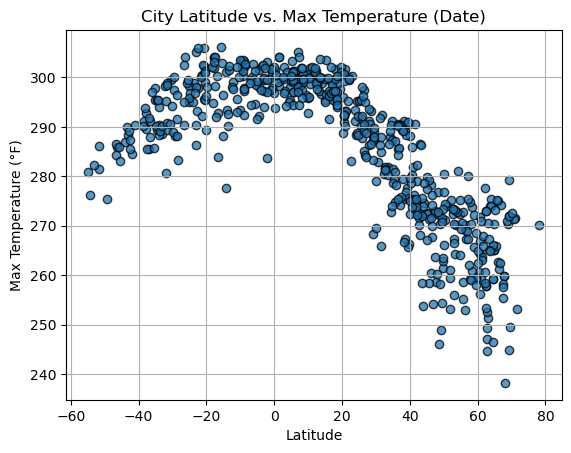

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

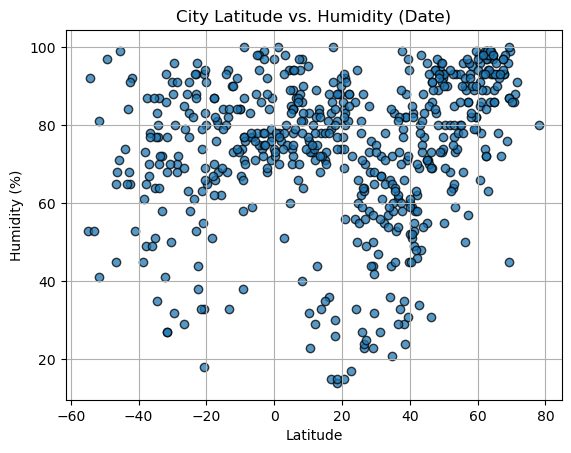

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

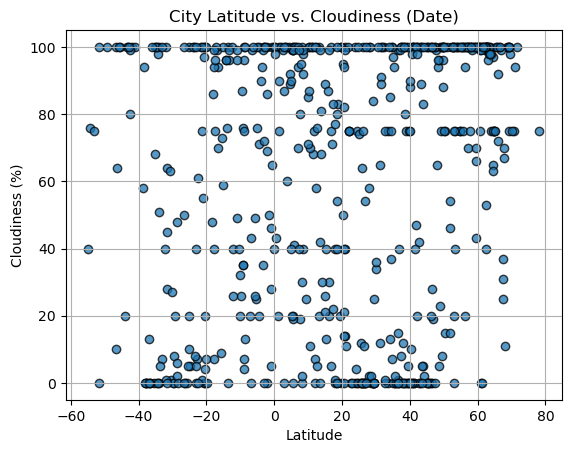

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

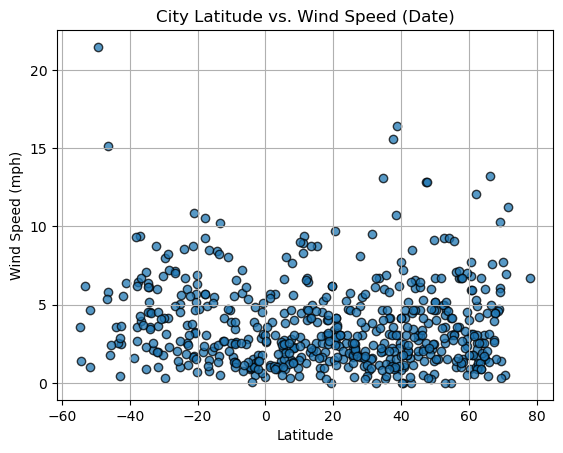

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the linear regression
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Label plot
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.title(f'City Latitude vs. {title} Linear Regression')
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show plot
    plt.show()


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,274.65,77,2,6.05,RO,1701304773
2,bethel,41.3712,-73.4140,273.45,55,0,3.09,US,1701304603
6,puerto san jose,13.9256,-90.8244,299.81,78,68,2.13,GT,1701304774
8,badger,64.8000,-147.5333,265.02,89,75,1.54,US,1701304507
10,haiku-pauwela,20.9219,-156.3051,301.58,80,40,4.12,US,1701304775


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,275.40,97,100,21.47,TF,1701304773
3,fale old settlement,-9.3852,-171.2468,302.14,74,87,5.55,TK,1701304773
4,kerikeri,-35.2268,173.9474,295.32,64,100,0.89,NZ,1701304774
5,waitangi,-43.9535,-176.5597,286.94,74,20,3.58,NZ,1701304774
7,blackmans bay,-43.0167,147.3167,288.44,84,100,0.45,AU,1701304774


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7780144753035563


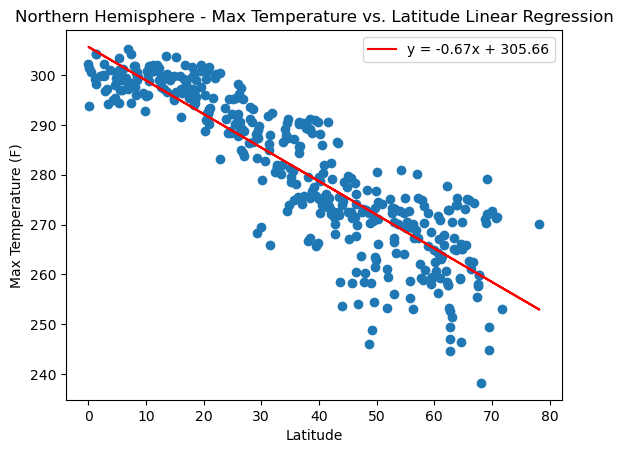

In [23]:
# Linear regression on Northern Hemisphere for Temperature vs. Latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temperature vs. Latitude Linear Regression')
plt.annotate(line_eq, (0, 0), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Northern_Temp_vs_Latitude.png")

# Show plot
plt.legend()
plt.show()


The r-value is: 0.40558512952193454


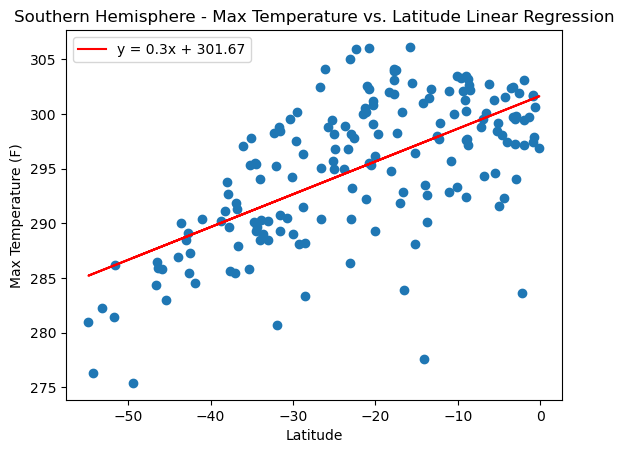

In [24]:
# Linear regression on Southern Hemisphere for Temperature vs. Latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temperature vs. Latitude Linear Regression')
plt.annotate(line_eq, (-50, 80), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Southern_Temp_vs_Latitude.png")

# Show plot
plt.legend()
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06962269086537491


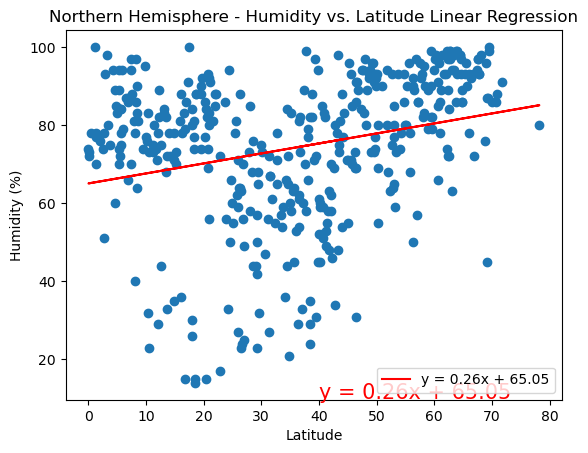

In [25]:
# Linear regression on Northern Hemisphere for Humidity vs. Latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.annotate(line_eq, (40, 10), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Northern_Humidity_vs_Latitude.png")

# Show plot
plt.legend()
plt.show()


The r-value is: 0.054977777190592755


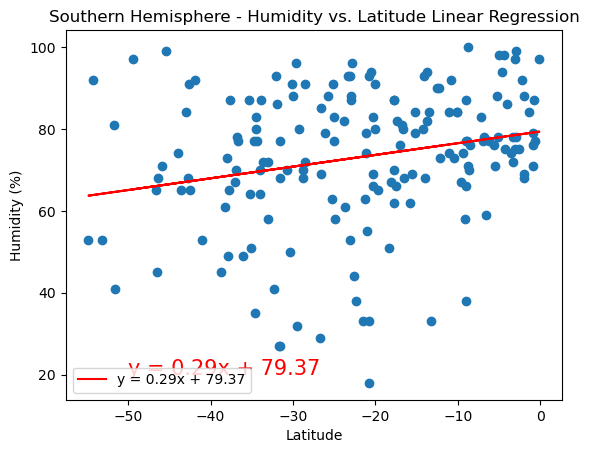

In [26]:
# Linear regression on Southern Hemisphere for Humidity vs. Latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.annotate(line_eq, (-50, 20), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Southern_Humidity_vs_Latitude.png")

# Show plot
plt.legend()
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03819940864690524


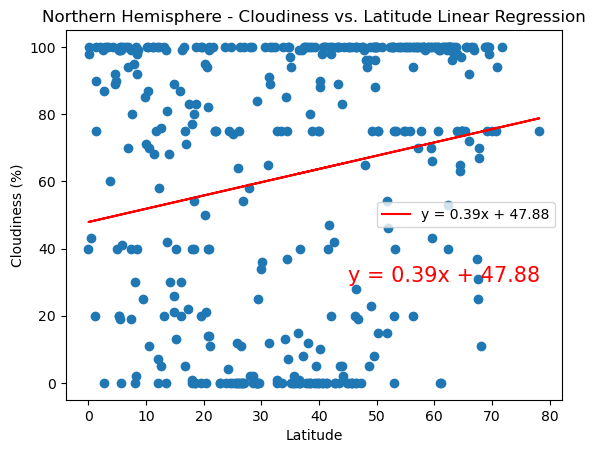

In [28]:
# Linear regression on Northern Hemisphere for Cloudiness vs. Latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.annotate(line_eq, (45, 30), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Northern_Cloudiness_vs_Latitude.png")

# Show plot
plt.legend()
plt.show()


The r-value is: 0.008430480620383101


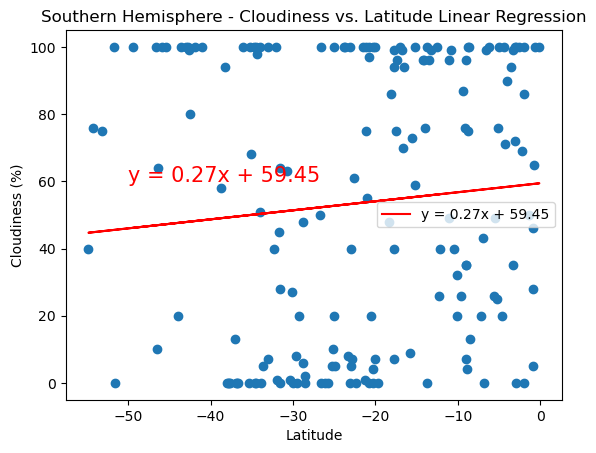

In [29]:
# Linear regression on Southern Hemisphere for Cloudiness vs. Latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.annotate(line_eq, (-50, 60), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Southern_Cloudiness_vs_Latitude.png")

# Show plot
plt.legend()
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.010749185987022871


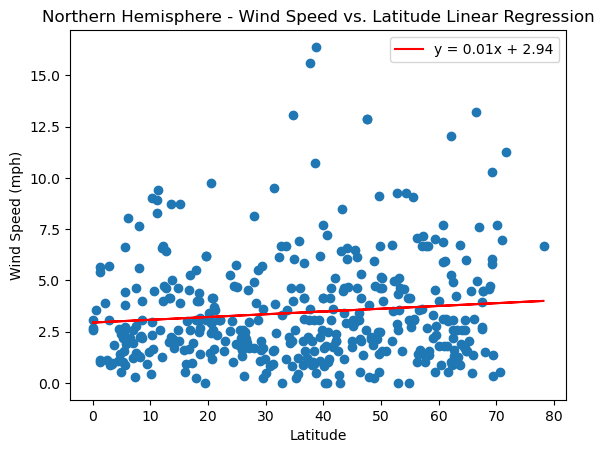

In [30]:
# Linear regression on Northern Hemisphere for Wind Speed vs. Latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.annotate(line_eq, (0, 25), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Northern_Wind_Speed_vs_Latitude.png")

# Show plot
plt.legend()
plt.show()


The r-value is: 0.07796964712958052


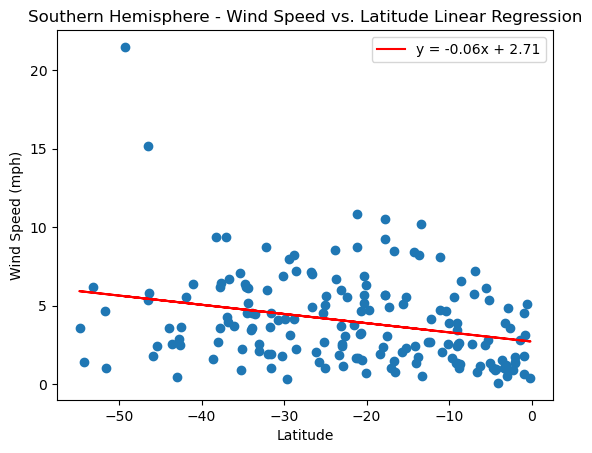

In [31]:
# Linear regression on Southern Hemisphere for Wind Speed vs. Latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.annotate(line_eq, (-50, 25), fontsize=15, color='red')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Southern_Wind_Speed_vs_Latitude.png")

# Show plot
plt.legend()
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE